# Notes of the computational details

### Originally, the whole network contains 74 nodes and 258 links. The first simplification is aggregating nodes into 34 zones (Origins/Destinations):
{1}: Seabrook (NH); {2,4,5}: NH; {3}: Haverhill; {6,8}: Lawrence; {7,9}: Georgetown; {10,11}: Lowell; {12,15}: Salem; {13,14}: Peabody; {16,17,18,19}: Burlington; {20}: Littleton; {21}: Lexington; {22}: Boston; {23,24,25,26,27,28}: Waltham; {29}: Quincy; {30,31,32,33,34}: Marlborough & Framingham; {35,71}: Milford; {36}: Franklin; {37,38,39,40,41}: Westwood & Quincy; {42}: Dedham; {43,44,45,46,47}: Foxborough; {48,74}: Taunton; {49,73}: Plymouth; {50,51}: Cape Cod; {52}: Dartmouth; {53}: Fall River; {54,68,70}: RI; {55,56}: VT; {57}: Westminster; {58}: Leominster; {59,60,72}: Worcester; {61}: Amherst; {62,63,64,65,66}: CT; {67}: Webster; {69}: Uxbridge

### Thus, we have $34 \times (34-1) = 1122$ OD pairs in total.

### The OD demand matrices were estimated by considering only the shortest route for each OD pair; then, an adjustment procedure (bi-level optimization) was taken for each day. We ended up with demand matrices on a daily basis.

### The input flow data were taken separately for weekdays and weekends: For weekdays, week_day_Apr_list = [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30], $120 \times 21 = 2520$ $258$-dimensional flow vectors in total; for weekends, weekend_Apr_list = [1, 7, 8, 14, 15, 21, 22, 28, 29],  $120 \times 9 = 1080$ $258$-dimensional flow vectors in total.


### The cost functions were taken as the same for the CDC network. 

### The socially optimal flows were solved using the MSA algorithm with a suitably modified cost function $${\overline t _a}\left( {{x_a}} \right) = \frac{d}{{d{x_a}}}\left( {{x_a}{t_a}\left( {{x_a}} \right)} \right) = {t_a}\left( {{x_a}} \right) + {x_a}{\dot t_a}\left( {{x_a}} \right)$$ as opposed to the cost function ${t_a}\left( {{x_a}} \right)$ of the typical TAP. Directly calling Ipopt would lead to memory issue on a 24 GB RAM machine.

# Visualization for PoA values of April 2012, PM period

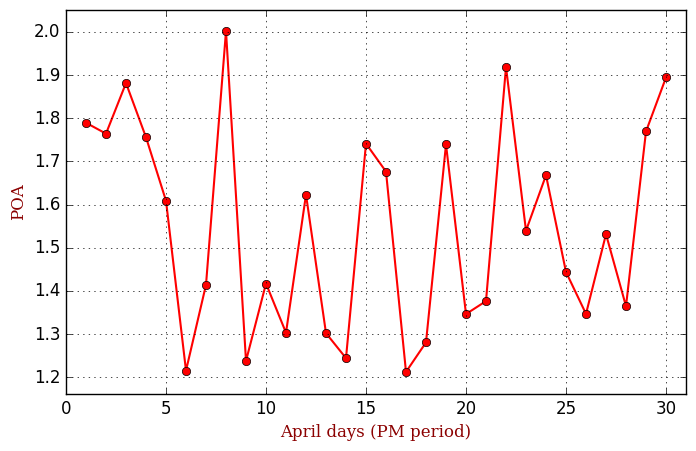

In [8]:
using PyPlot

day = 1:30

poa = map(day->poaDictApr["$(day)"], day)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(8,4.8))

plot(day, poa, "o-r", linewidth=1.5)

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0, 31)
ylim(minimum(poa)-.05, maximum(poa)+.05)

font1 = Dict("family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>12)

xlabel("April days (PM period)", fontdict=font1)
ylabel("POA", fontdict=font1)

savefig("./results/POA_Apr_journal.pdf")

# Visualization for socially optimal flows and observed flows (4/1/2012-4/30/2012; PM period) 

## Plots for weekdays

### Example: PM period, 4/18/2012, Wednesday

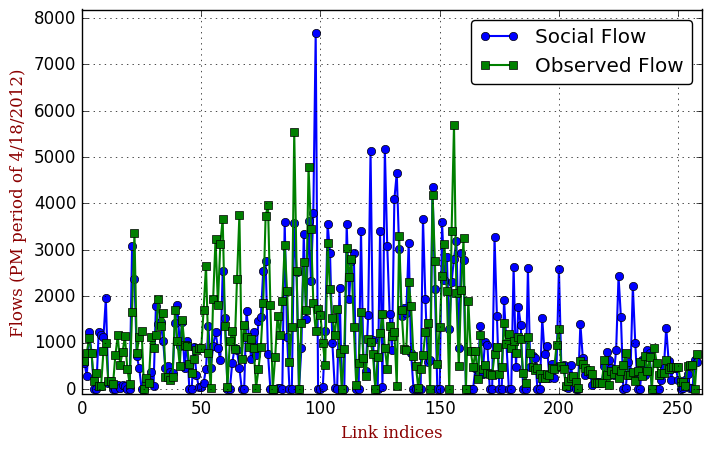

In [16]:
link_idx = 1:258

# week_day_Apr_list = [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30]
week_day_Apr_list = [18]

for day in week_day_Apr_list

    socialFlow = map(link_idx->tapSocialFlowVecDictApr["$(day)"][link_idx], link_idx)
    observFlow = flow_observ[link_idx, day]

    # plot(iterNum, objFun, "s-g", label="True")

    fig = figure(figsize=(8,4.8))

    plot(link_idx, socialFlow, "o-b", linewidth=1.5, label="Social Flow")
    plot(link_idx, observFlow, "s-g", linewidth=1.5, label="Observed Flow")

    # legend(loc=0, fancybox="true", bbox_to_anchor=(0.1, 0)) 
    legend(loc=0, fancybox="true") 

    grid("on")

    xlim(0, 260)
#     xticks(1:30)
    ylim(-100, maximum([maximum(socialFlow), maximum(observFlow)])+500)

    font1 = Dict("family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>12)

    xlabel("Link indices", fontdict=font1)
    ylabel("Flows (PM period of 4/$(day)/2012)", fontdict=font1)

    savefig("./results/Social_observed_flows_Apr_$(day)_journal.pdf")
    
end

## Plots for weekends

### Example: PM period, 4/15/2012, Sunday

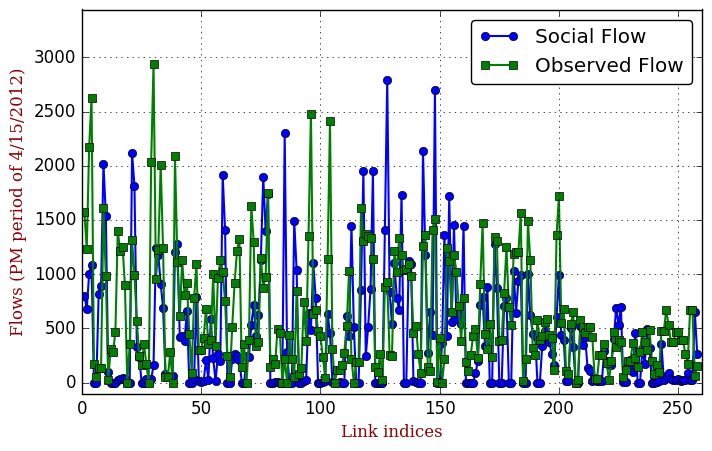

In [17]:
link_idx = 1:258

# weekend_Apr_list = [1, 7, 8, 14, 15, 21, 22, 28, 29]
weekend_Apr_list = [15]

for day in weekend_Apr_list

    socialFlow = map(link_idx->tapSocialFlowVecDictApr["$(day)"][link_idx], link_idx)
    observFlow = flow_observ[link_idx, day]

    # plot(iterNum, objFun, "s-g", label="True")

    fig = figure(figsize=(8,4.8))

    plot(link_idx, socialFlow, "o-b", linewidth=1.5, label="Social Flow")
    plot(link_idx, observFlow, "s-g", linewidth=1.5, label="Observed Flow")

    # legend(loc=0, fancybox="true", bbox_to_anchor=(0.1, 0)) 
    legend(loc=0, fancybox="true") 

    grid("on")

    xlim(0, 260)
#     xticks(1:30)
    ylim(-100, maximum([maximum(socialFlow), maximum(observFlow)])+500)

    font1 = Dict("family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>12)

    xlabel("Link indices", fontdict=font1)
    ylabel("Flows (PM period of 4/$(day)/2012)", fontdict=font1)

    savefig("./results/Social_observed_flows_Apr_$(day)_journal.pdf")
    
end